# Zadání semestrální práce 2016 - kvasinky

Cílem práce je sledování pohybu kvasinek v obrazu z mikroskopu. Úloha je rozdělena na dvě části:

* Nalezení modelu pozadí
* Sledování kvasinek

V první části jde o nalezení pozadí. To je ve videích poměrně neměnné. Prakticky je nutné naimplementovat třídu `BackgroundModel`. 

Druhá část řeší vlastní sledování kvasinek. Tam je úkolem nalezení pohybující se kvasinky, určení její polohy v pixelech a směru jejího pohybu (předpokládanou polohu v následujícím framu).

![kvasinky](http://147.228.240.61/zdo/2015/kvasinky-res.png)

Data:

http://147.228.240.61/zdo/2015/converted2/

případně alternativně

http://147.228.240.61/zdo/2015/converted/


Základ pro semestrální práci
http://github.com/neduchal/ZDO2015_sem_prace/

## Požadované rozhraní

vstupem odevzdávané aplikace bude skript, který je možné volat z příkazové řádky následujícím způsobem

        python kvasinky.py -i adresar_s_jpg_soubory -dt 0.020 -o vystupni.csv -d 

První argument označuje vstupní data, druhý označuje časový posun mezi jednotlivými framy. Třetí parametr popisuje výstupní soubor. Poslední parametr je volitelný. Pokud je použit. Bude spuštěn debugovací režim s vykreslením jednotlivých kroků.


Výstupní soubor obsahuje informace o detekovaných kvasinkách. Je ve formátu `csv` a musí obsahovat následující sloupce:
    * `time` čas události
    * `id`   číselný identifikátor objektu
    * `x_px` x-ová souřadnice objektu v pixelech
    * `y_px` y-ová souřadnice objektu v pixelech

Volitelně pak lze přidat i sloupce popisující směr pohybu objektu a jeho rychlost

    * `angle` úhlel pohybu
    * `speed_px` rychlost pohybu v pixelech za sekundu

    

In [ ]:
## 

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# http://147.228.240.61/zdo/2015/converted/

## Načítání obrázků z adresáře

In [8]:
import scipy
import scipy.misc
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import model
# import tracker


# prostor pro inicializaci
# 1.část
# bm = model.BackgroundModel()
# 2.část
# tr = tracker.Tracker()

files = sorted(glob.glob('/home/mjirik/tmp/kvasinky1/*.jpg'))

for filename in files:
    img = scipy.misc.imread(filename)
    # zde místo pro práci s každým snímkem
    
    # 1.část
    # bm.add_frame(gray_img)
    # model = bm.get_model()
    # img_without_background = img - model
    
    # 2.část
    # tr.track_in_frame(gray_img)

# ulož výsledky
# tr.saveCsvFile()    



    

# Medicína - bránice

![kvasinky](http://147.228.240.61/zdo/2016/bn-diagragm-segmentation-0.png)
![kvasinky](http://147.228.240.61/zdo/2016/bn-diagragm-profile-0.png)

![kvasinky](http://147.228.240.61/zdo/2016/bn-diagragm-segmentation-1.png)
![kvasinky](http://147.228.240.61/zdo/2016/bn-diagragm-profile-1.png)



![kvasinky](http://147.228.240.61/zdo/2016/bn-spine-001.png)
![kvasinky](http://147.228.240.61/zdo/2016/bn-spine-002.png)
![kvasinky](http://147.228.240.61/zdo/2016/bn-spine-003.png)

## Jak si zkusit prohlédnout játra


ukázková data lze stáhnout zde:

http://147.228.240.61/zdo/2016/jatra_5mm.hdf5



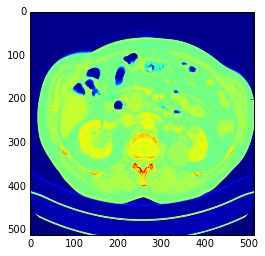

 size of voxel:  [ 5.    0.75  0.75]  mm


In [15]:
import h5py
import matplotlib.pyplot as plt

f = h5py.File('jatra_5mm.hdf5','r')
data3d = f['data3d']
metadata = f['metadata']


plt.imshow(data3d[30, :, :])
plt.show()

print 'size of voxel: ', np.asarray(metadata['voxelsize_mm']), ' mm'

## Klasifikace obrázků na text/netext (kontakt : neduchal@kky.zcu.cz)

Úkolem v této semestrální práci je vytvořit dataset obrázků, které by sloužily k natrénování klasifikátoru schopného rozlišit obraz dle jeho obsahu na text/netext. Cílem není zjistit jaké znaky případný text obsahuje (OCR), pouze přinést informaci o tom zda se na obrázku text nachází. 

### Postup

* Vytvořit zdrojové obrazy (scan dokumentů a novin, fotky, ...)
* Vytvořit skript v pythonu, který z výše uvedených dat vytvoří dataset (obrázky o stejné velikosti získané náhodným vyříznutím ze zdrojových dat) s informací od učitele o tom zda je na daném obrázku text nebo ne. 
* Rozdělení výše uvedeného na trénovací a testovací data (lze automatizovat)
* Provedení sady experimentů s různými klasifikátory 
    * Vybrání příznaků použitých v klasifikátoru
    * Natrénování klasifikátoru
    * Analýza dat
